In [166]:
import pandas as pd

In [167]:
covid= pd.read_csv("covid.csv")
covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,3/31/2020 23:43,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,3/31/2020 23:43,30.295065,-92.414197,39,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,3/31/2020 23:43,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,3/31/2020 23:43,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,3/31/2020 23:43,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [168]:
covid.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

In [169]:
covid.dtypes

FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Last_Update        object
Lat               float64
Long_             float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
Combined_Key       object
dtype: object

In [170]:
country=covid.groupby('Country_Region').Confirmed.sum()

In [171]:
country

Country_Region
Afghanistan                  174
Albania                      243
Algeria                      716
Andorra                      376
Angola                         7
Antigua and Barbuda            7
Argentina                   1054
Armenia                      532
Australia                   4559
Austria                    10180
Azerbaijan                   298
Bahamas                       14
Bahrain                      567
Bangladesh                    51
Barbados                      34
Belarus                      152
Belgium                    12775
Belize                         3
Benin                          9
Bhutan                         4
Bolivia                      107
Bosnia and Herzegovina       420
Botswana                       4
Brazil                      5717
Brunei                       129
Bulgaria                     399
Burkina Faso                 261
Burma                         15
Burundi                        2
Cabo Verde                  

In [173]:
country=country.to_frame()

In [174]:
major_countries=country.loc[country['Confirmed']>=1000]

In [175]:
major_countries

,Confirmed
Country_Region,
Argentina,1054
Australia,4559
Austria,10180
Belgium,12775
Brazil,5717
Canada,8527
Chile,2738
China,82279
Czechia,3308


In [176]:
major_countries=major_countries.sort_values('Confirmed',ascending=False)

In [177]:
major_countries

,Confirmed
Country_Region,
US,188172
Italy,105792
Spain,95923
China,82279
Germany,71808
France,52827
Iran,44605
United Kingdom,25481
Switzerland,16605


In [178]:
Total = country['Confirmed'].sum()
Total = '{:,.0f}'.format(Total)
Total

'857,487'

Text(0.5, 1.0, 'Histogram - Count of Covid Cases per Country')

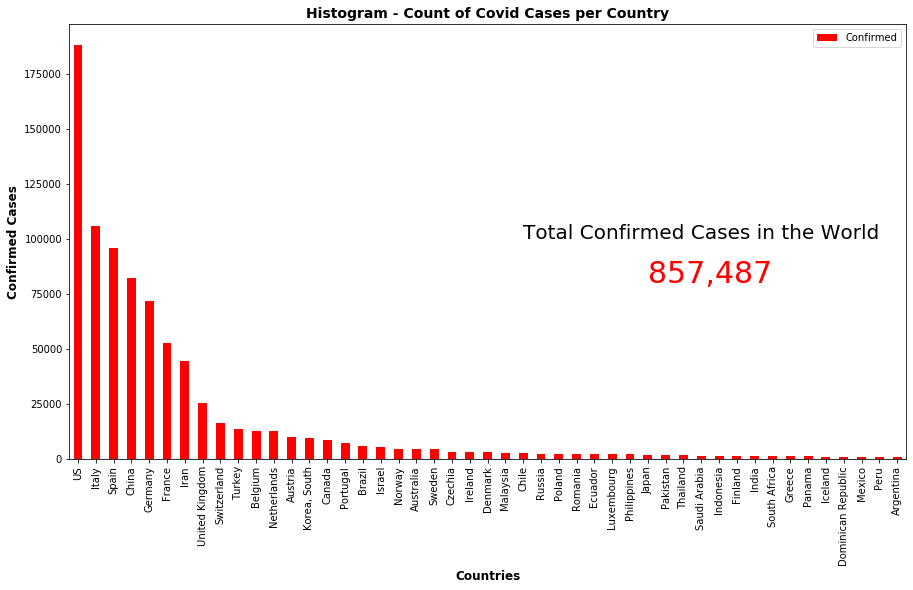

In [179]:
import matplotlib.pyplot as plt
major_countries.plot(kind='bar',figsize=(15,8),color='red')
plt.text(25, 100000, 'Total Confirmed Cases in the World', style='normal',fontsize=20)
plt.text(32, 80000, Total, style='normal',fontsize=30,color='r')
plt.xlabel('Countries',fontsize=12, fontweight='bold')
plt.ylabel('Confirmed Cases',fontsize=12, fontweight='bold')
plt.title('Histogram - Count of Covid Cases per Country',fontsize=14, fontweight='bold')

In [180]:
deaths=covid.groupby('Country_Region').Deaths.sum()
type(deaths)

pandas.core.series.Series

In [181]:
deaths=deaths.to_frame()

In [182]:
type(deaths)

pandas.core.frame.DataFrame

In [183]:
deaths=deaths.sort_values('Deaths',ascending=False)
deaths

,Deaths
Country_Region,
Italy,12428
Spain,8464
US,3873
France,3532
China,3309
Iran,2898
United Kingdom,1793
Netherlands,1040
Germany,775


In [184]:
deaths=deaths.loc[deaths['Deaths']>=300]
deaths

,Deaths
Country_Region,
Italy,12428
Spain,8464
US,3873
France,3532
China,3309
Iran,2898
United Kingdom,1793
Netherlands,1040
Germany,775


In [185]:
Total_deaths = deaths['Deaths'].sum()
Total_deaths = '{:,.0f}'.format(Total_deaths)
Total_deaths

'39,250'

Text(0.5, 1.0, 'Deaths per Country')

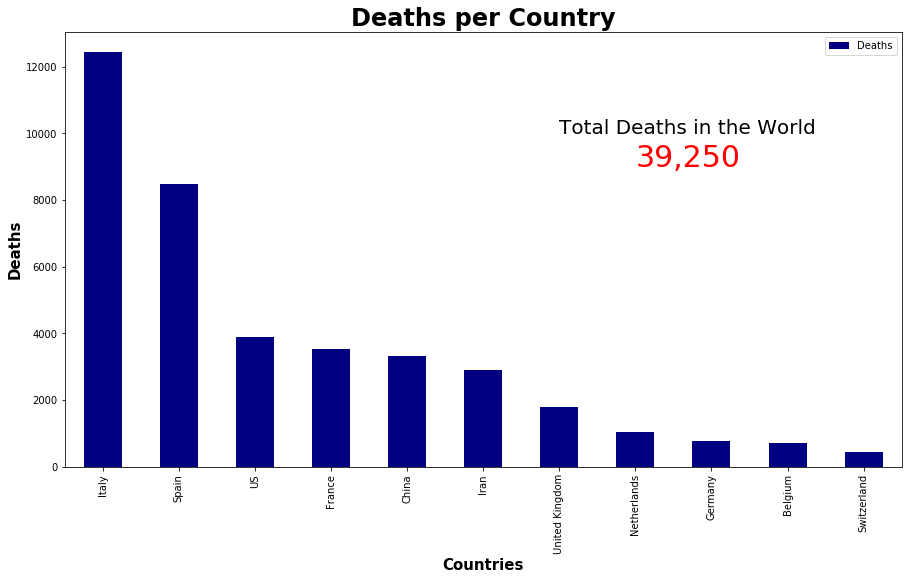

In [188]:
import matplotlib.pyplot as plt
deaths.plot(kind='bar',figsize=(15,8),color='navy')
plt.text(6, 10000, 'Total Deaths in the World', style='normal',fontsize=20)
plt.text(7, 9000, Total_deaths, style='normal',fontsize=30,color='r')
plt.xlabel('Countries',fontsize=15, fontweight='bold')
plt.ylabel('Deaths',fontsize=15, fontweight='bold')
plt.title('Deaths per Country',fontsize=24, fontweight='bold')